<a href="https://colab.research.google.com/github/RajMukherjee1601/hand_gesture_detection/blob/main/Hand_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 34.7 MB/s 


In [ ]:
import cv2
import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [ ]:
# Initialize the mediapipe hands class.
mp_hands = mp.solutions.hands

# Set up the Hands functions for images and videos.
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
hands_videos = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def detectHandsLandmarks(image, hands, draw=True, display = True):
    # Create a copy of the input image to draw landmarks on.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Hands Landmarks Detection.
    results = hands.process(imgRGB)
    
    # Check if landmarks are found and are specified to be drawn.
    if results.multi_hand_landmarks and draw:
        
        # Iterate over the found hands.
        for hand_landmarks in results.multi_hand_landmarks:
            
            # Draw the hand landmarks on the copy of the input image.
            mp_drawing.draw_landmarks(image = output_image, landmark_list = hand_landmarks,
                                      connections = mp_hands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                                   thickness=2, circle_radius=2),
                                      connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0),
                                                                                     thickness=2, circle_radius=2))
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of hands landmarks detection.
        return output_image, results              

In [ ]:
from google.colab import files
upload=files.upload()

Saving depositphotos_10182313-stock-photo-hand-symbol.jpg to depositphotos_10182313-stock-photo-hand-symbol.jpg


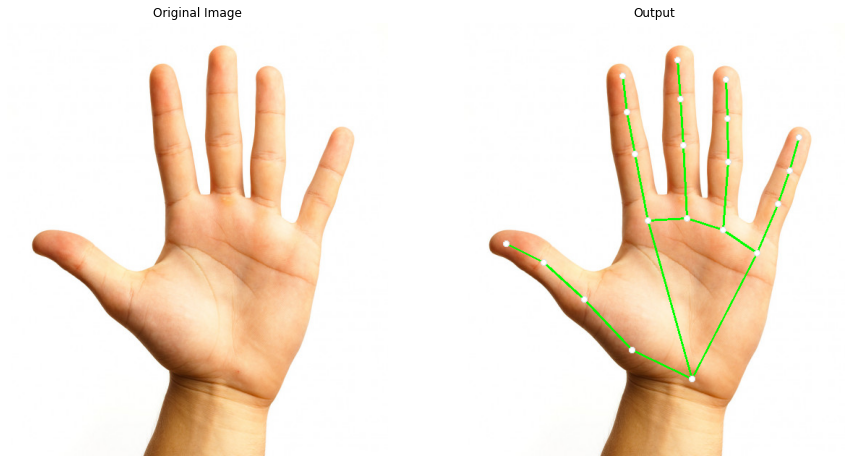

In [ ]:
# Read a sample image and perform hands landmarks detection on it.
image = cv2.imread("depositphotos_10182313-stock-photo-hand-symbol.jpg")
detectHandsLandmarks(image, hands, display=True)